# 분류 모델 복습: Titanic 생존자 예측

Titanic 데이터셋은 1912년 침몰한 타이타닉 호의 승객 정보를 담고 있습니다. 이 데이터를 사용하여 승객의 생존 여부를 예측하는 분류 모델을 만들어 보겠습니다.

#### 데이터 로드

In [4]:
import seaborn as sns
df = sns.load_dataset('titanic')
# 사용하지 않을 열을 제거합니다.
df = df.drop(['deck', 'embark_town', 'alive', 'who'], axis=1)
# 결측치를 처리합니다. 'age'는 중앙값으로, 'embarked'는 최빈값으로 채웁니다.
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True,True


#### Q1. 범주형 변수를 One-hot encoding(`pd.get_dummies`)하세요

'sex', 'embarked', 'class' 열에 대해 One-hot encoding을 적용하세요.

In [5]:
import pandas as pd
df2 = pd.get_dummies(df, columns=['sex', 'embarked', 'class'], drop_first=True)


#### Q2. 모델링을 위해 데이터에서 X와 y("survived")를 분리합니다

In [6]:
X = df2.drop('survived', axis=1)
y = df2['survived']

#### Q3. StandardScaler를 사용하여 X값을 스케일링하세요.

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Q4. Train/test 데이터를 분리합니다

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

#### Q5. 랜덤 포레스트 모델을 학습시키세요

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

#### Q6. 모델 성능을 평가합니다

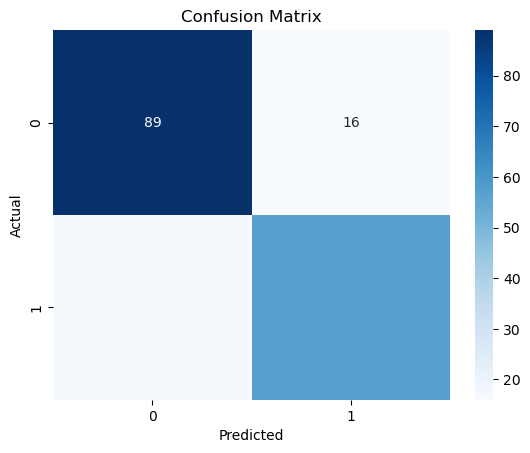

정확도: 0.8156, 정밀도: 0.7808. 회수율: 0.7703


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

import matplotlib.pyplot as plt

confusion_matrix_rf = confusion_matrix(y_test, rf_y_pred)
confusion_matrix_rf

sns.heatmap(confusion_matrix_rf, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

accuracy_rf = accuracy_score(y_test, rf_y_pred)
precision_rf = precision_score(y_test, rf_y_pred)
recall_rf = recall_score(y_test, rf_y_pred)

print(f"정확도: {round(accuracy_rf, 4)}, 정밀도: {round(precision_rf, 4)}. 회수율: {round(recall_rf, 4)}")


#### Q7. Feature Importance를 확인합니다

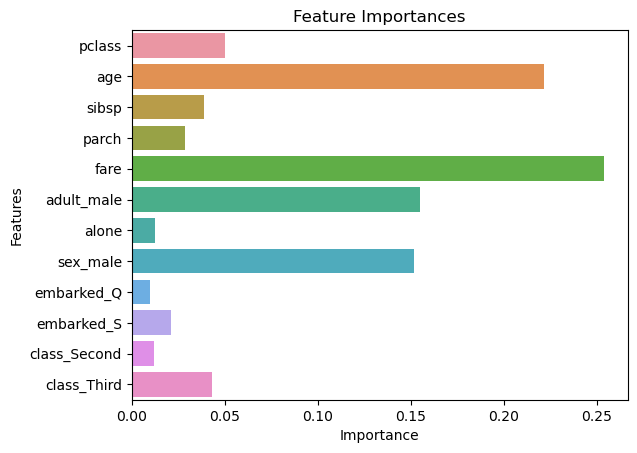

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
sns.barplot(x=importances, y=X.columns)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()

In [13]:
rf_y_pred = rf_model.predict(X_test)
rf_y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [14]:
rf_y_pred_proba = rf_model.predict_proba(X_test)
rf_y_pred_proba

array([[0.8       , 0.2       ],
       [0.98      , 0.02      ],
       [0.9525    , 0.0475    ],
       [0.        , 1.        ],
       [0.64      , 0.36      ],
       [0.04      , 0.96      ],
       [0.16887854, 0.83112146],
       [0.94333333, 0.05666667],
       [0.28333333, 0.71666667],
       [0.05      , 0.95      ],
       [0.51      , 0.49      ],
       [0.94      , 0.06      ],
       [0.99      , 0.01      ],
       [0.93      , 0.07      ],
       [0.78453571, 0.21546429],
       [0.05      , 0.95      ],
       [0.74      , 0.26      ],
       [0.03658333, 0.96341667],
       [0.84      , 0.16      ],
       [0.95      , 0.05      ],
       [0.97      , 0.03      ],
       [0.49183333, 0.50816667],
       [0.81      , 0.19      ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.95      , 0.05      ],
       [0.8       , 0.2       ],
       [0.96166667, 0.03833333],
       [0.82      , 0.18      ],
       [0.43      , 0.57      ],
       [0.

<추가 설명>

추가로 참고할 수 있는 성능 지표들은 아래를 참고하세요.

#### F1 Score

F1 Score는 Precision(정밀도)과 Recall(재현율)의 조화평균입니다. 이 두 지표를 균형있게 고려하여 모델의 성능을 평가합니다.

F1 = 2 * (Precision * Recall) / (Precision + Recall)

```python
from sklearn.metrics import f1_score
f1 = f1_score(y_true, y_pred)
```

#### AUC/ROC (Area Under the Curve / Receiver Operating Characteristic)

[참고](https://mlu-explain.github.io/roc-auc/)

방금까지의 예측 값은 예측 확률을 0.5를 기준으로 0/1을 구분했습니다. 하지만 이는 바뀔 수 있죠. 이 임계값(threshold)을 변경해가며 모델의 성능 변화를 종합적으로 평가합니다.

**ROC 곡선**: 
- X축: False Positive Rate (1 - Specificity)
- Y축: True Positive Rate (Sensitivity 또는 Recall)
- 임계값을 변경해가며 이 두 값의 변화를 그래프로 나타냅니다.

```python
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_true, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
```